# E-Commerce Sales Analysis 

##  Objective
The objective of this project is to perform exploratory data analysis (EDA) on an online retail dataset to understand sales trends, customer behavior, product performance, and geographic distribution. The analysis aims to derive meaningful business insights that can support data-driven decision-making.

##  Dataset Description
This is a transnational dataset containing all transactions that occurred between **01/12/2010 and 09/12/2011** for a **UK-based and registered non-store online retail company**. The company primarily sells **unique all-occasion gift items**, and a significant portion of its customers are **wholesalers**.

The dataset includes detailed transactional information such as invoice numbers, product descriptions, quantities, prices, customer identifiers, and purchase dates.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\ukonlineretail\data.csv", encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.shape
df.columns
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  str    
 1   StockCode    541909 non-null  str    
 2   Description  540455 non-null  str    
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  str    
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  str    
dtypes: float64(2), int64(1), str(5)
memory usage: 33.1 MB


In [7]:
df = df.dropna(subset=['CustomerID'])

df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

df = df[df['Quantity'] > 0]

df = df[df['UnitPrice'] > 0]

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df = df.drop_duplicates()

df['Country'] = df['Country'].str.strip()

df['Revenue'] = df['Quantity'] * df['UnitPrice']

df['Year'] = df['InvoiceDate'].dt.year

df['Month'] = df['InvoiceDate'].dt.to_period('M')

df.info()


<class 'pandas.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  str           
 1   StockCode    392692 non-null  str           
 2   Description  392692 non-null  str           
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[us]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  str           
 8   Revenue      392692 non-null  float64       
 9   Year         392692 non-null  int32         
 10  Month        392692 non-null  period[M]     
dtypes: datetime64[us](1), float64(3), int32(1), int64(1), period[M](1), str(4)
memory usage: 34.5 MB


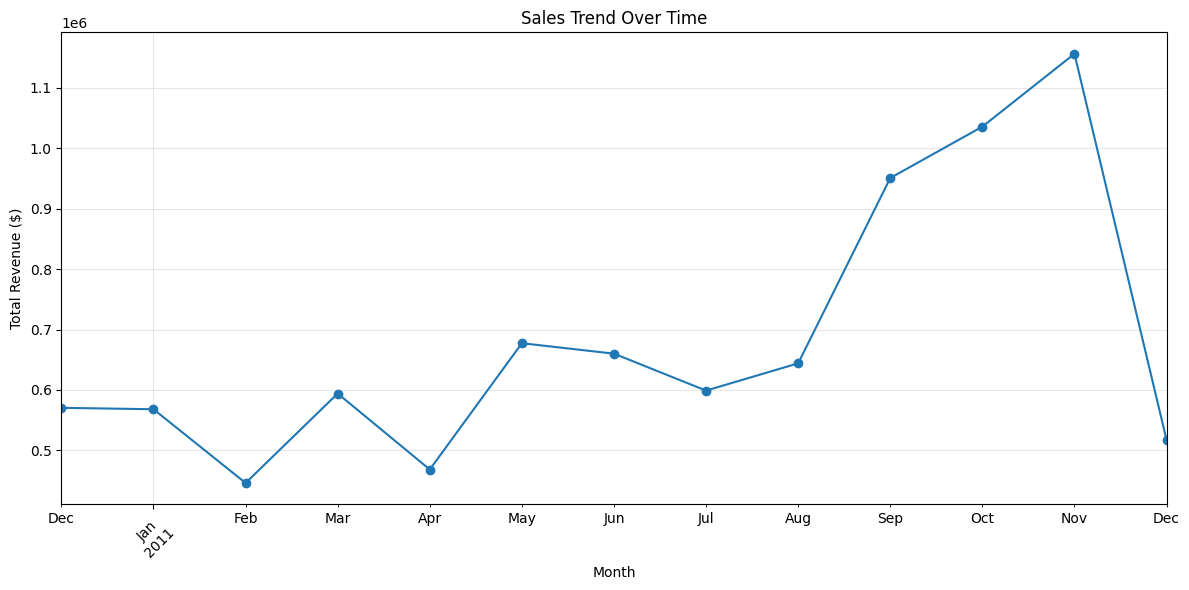

In [8]:
monthly_sales = df.groupby('Month')['Revenue'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insight: Sales Trend Over Time

Sales remain relatively stable during the first half of the year, with minor fluctuations, before showing a sharp and sustained increase from September to November. This peak suggests strong seasonal demand, likely driven by holiday and year-end purchasing behavior, as well as the impact of promotional activities such as holiday discounts and end-of-season sales, which typically encourage higher customer spending. The decline observed in December may be attributed to incomplete month data rather than an actual drop in demand. Overall, the trend highlights the importance of the final quarter as a critical revenue-generating period for the business.

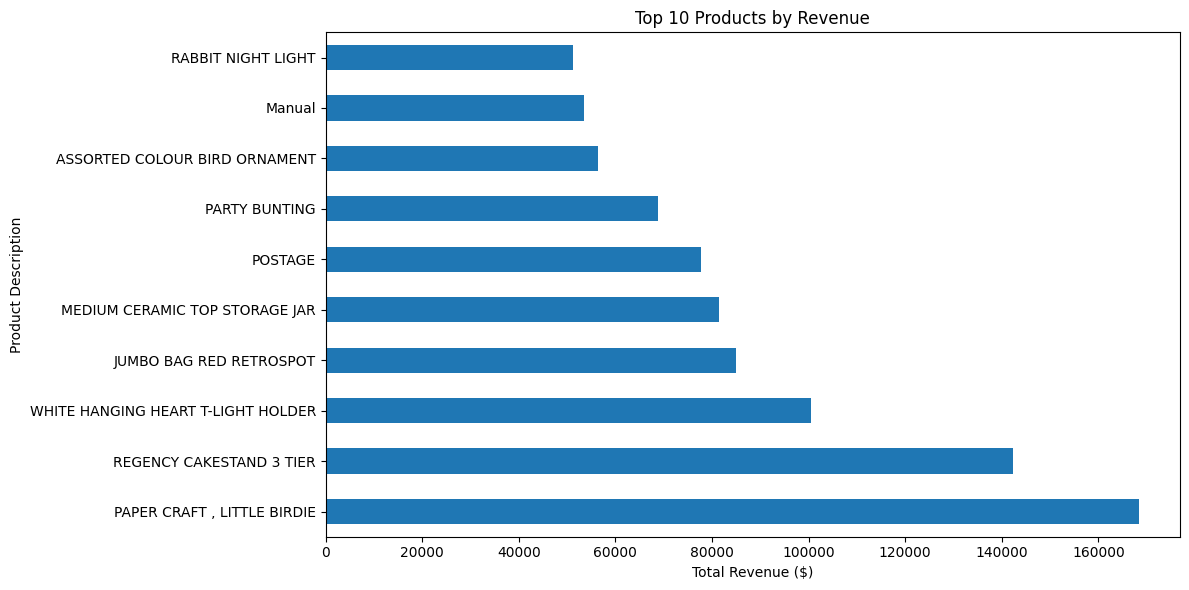

In [9]:
products_by_revenue = df.groupby('Description')['Revenue'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
products_by_revenue.plot(kind='barh')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

### Insight: Top Products by Revenue

Revenue is heavily concentrated among a small set of products, with “Paper Craft, Little Birdie” and “Regency Cakestand 3 Tier” emerging as the highest revenue generators by a significant margin. These products likely benefit from strong demand, repeat purchases, or suitability for gifting occasions. The presence of decorative and gift-oriented items among the top performers suggests that a limited number of high-performing SKUs contribute disproportionately to overall revenue, highlighting opportunities for focused inventory planning, targeted promotions, and strategic bundling around these best-selling products.

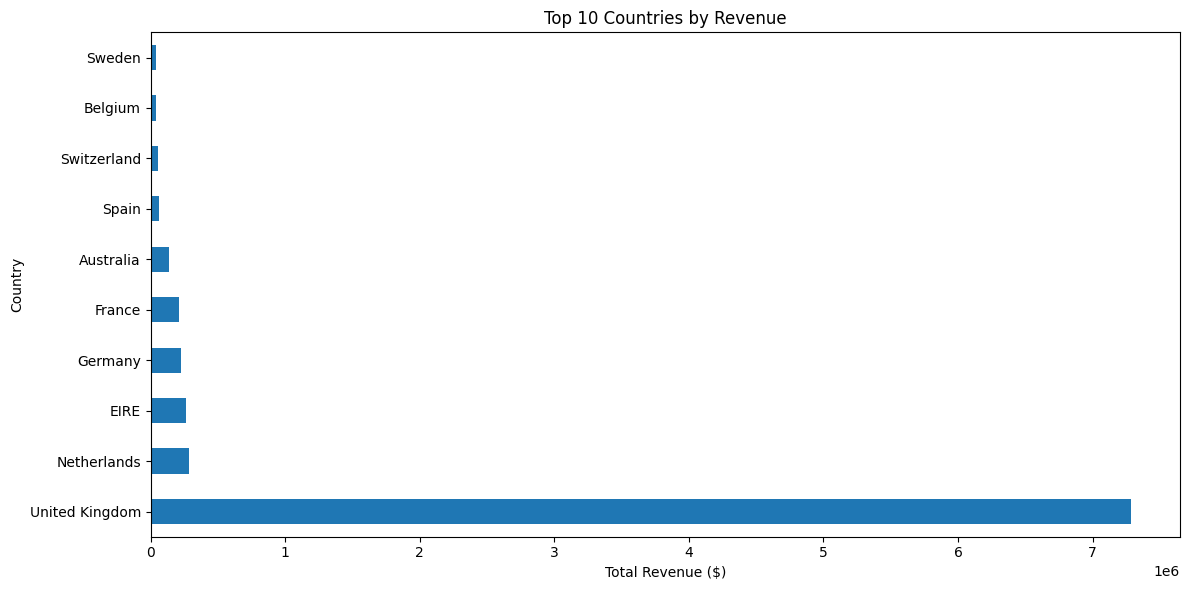

In [10]:
revenue_by_country = df.groupby('Country')['Revenue'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
revenue_by_country.plot(kind='barh')
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Insight: Country-wise Revenue Distribution

Revenue is overwhelmingly concentrated in the United Kingdom, which contributes a significantly larger share of total sales compared to all other countries. This dominance reflects the company’s UK-based operations and primary customer base, while international markets such as the Netherlands, Ireland (EIRE), Germany, and France contribute relatively smaller portions of revenue. The sharp gap between the UK and other countries suggests that international sales exist but remain underpenetrated, indicating potential opportunities for targeted expansion, localized marketing strategies, or improved logistics in high-performing non-UK markets.

In [14]:
# Calculate Average Order Value (AOV) as total revenue per invoice averaged across invoices
invoice_revenue = df.groupby('InvoiceNo')['Revenue'].sum()
average_order_value = invoice_revenue.mean()

print(f'Average Order Value: ${average_order_value:.2f}')

Average Order Value: $479.56


### Insight: Average Order Value (AOV)

An average order value of $479.56 indicates that customers typically place high-value orders, suggesting a purchasing pattern dominated by bulk buying or wholesale transactions rather than single-item purchases. This aligns with the company’s business model of selling unique gift items to a significant number of wholesalers. The relatively high AOV highlights opportunities to further increase revenue through bundled offerings, volume-based discounts, and targeted upselling strategies.

Invoices: 18532
Mean: 278.01 | Median: 154 | Mode: 1
25th pct: 74 | 75th pct: 290


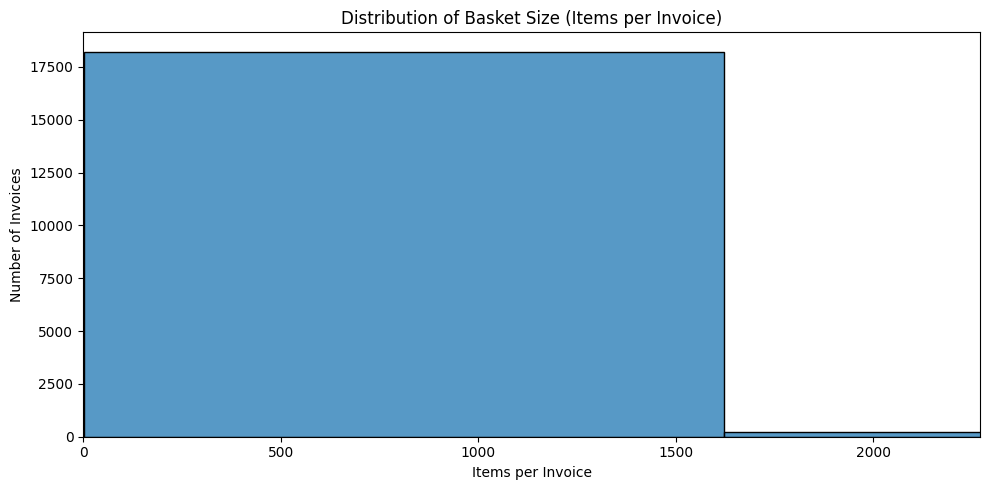

Recommended basket size parameter: 154 items per order


In [13]:
# Ensure dataframe exists and is minimally preprocessed (needed if this cell is run independently)
if 'df' not in globals():
	df = pd.read_csv(r"C:\Users\Lenovo\Desktop\ukonlineretail\data.csv", encoding='latin-1')
	df = df.dropna(subset=['CustomerID'])
	df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
	df = df[df['Quantity'] > 0]
	df = df[df['UnitPrice'] > 0]
	df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
	df = df.drop_duplicates()
	df['Country'] = df['Country'].str.strip()
	df['Revenue'] = df['Quantity'] * df['UnitPrice']
	df['Year'] = df['InvoiceDate'].dt.year
	df['Month'] = df['InvoiceDate'].dt.to_period('M')

# Basket Size (items per invoice)
basket_size = df.groupby('InvoiceNo')['Quantity'].sum()

# Summary statistics
mean_bs = basket_size.mean()
median_bs = basket_size.median()
mode_bs = basket_size.mode().iloc[0] if not basket_size.mode().empty else np.nan
p25, p75 = np.percentile(basket_size, [25, 75])

print(f"Invoices: {basket_size.size}")
print(f"Mean: {mean_bs:.2f} | Median: {median_bs:.0f} | Mode: {mode_bs:.0f}")
print(f"25th pct: {p25:.0f} | 75th pct: {p75:.0f}")

# Distribution plot (limit x to 99th percentile to reduce long-tail effect)
xlim = basket_size.quantile(0.99)
plt.figure(figsize=(10, 5))
sns.histplot(basket_size, bins=50, kde=False)
plt.xlim(0, xlim)
plt.title('Distribution of Basket Size (Items per Invoice)')
plt.xlabel('Items per Invoice')
plt.ylabel('Number of Invoices')
plt.tight_layout()
plt.show()

# Recommended parameter (use median as robust typical basket size)
recommended_basket_size = int(median_bs)
print(f"Recommended basket size parameter: {recommended_basket_size} items per order")

### 📌 Insight: Basket Size (Items per Invoice)

The distribution of basket size is highly right-skewed, indicating the presence of large bulk orders alongside smaller purchases. While the mean basket size is 278 items, the median basket size of 154 items provides a more accurate representation of a typical order, as it is less influenced by extreme wholesale transactions. The wide gap between the 25th and 75th percentiles further suggests that a significant portion of revenue is driven by high-volume orders, reinforcing the wholesale-oriented nature of the business.


### Final Conclusion

This exploratory data analysis reveals a business model driven by seasonal demand, high-value transactions, and bulk purchasing behavior. Sales performance is strongly influenced by the final quarter of the year, highlighting the importance of holiday-driven demand and promotional strategies. Revenue concentration among a limited number of high-performing products indicates opportunities for focused inventory optimization and targeted marketing efforts.

The dominance of the United Kingdom in overall revenue reflects the company’s core market strength, while comparatively lower contributions from international markets suggest potential for strategic expansion beyond the domestic customer base. Additionally, the combination of a high average order value and large basket sizes confirms the significant role of wholesale transactions in driving revenue, emphasizing the importance of volume-based pricing and bundled offerings.

Overall, the analysis provides actionable insights that can support data-driven decisions in sales planning, product strategy, and market expansion, reinforcing the value of leveraging transactional data to align business operations with customer purchasing patterns and demand dynamics.